In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("./data/data_cn_lc.xlsx")
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Company_name,Company_area,Company_code,Company_industry,CITI,CITI_all_rank,CITI_trade_rank,CATI,CATI_all_rank,CATI_trade_rank,...,rank_Assistant1,rank_Claude-instant0,rank_Claude-instant1,rank_Claude-instant2,rank_GPT-3.5-Turbo0,rank_GPT-3.5-Turbo1,rank_GPT-3.5-Turbo-Instruct0,rank_GPT-3.5-Turbo-Instruct1,rank_GPT-40,rank_Web-Search0
0,李宁有限公司,中国大陆,02331.HK,"纺织, 皮革",39.46,39,11,24.8,284,32,...,B,B-,B,B-,C,B,B,C+,C,-
1,联想集团有限公司,中国大陆,00992.HK,IT/ ICT,46.44,34,9,65.2,15,7,...,A,A-,A+,B,A,A,A,A-,B+,-
2,雅戈尔集团股份有限公司,中国大陆,600177.SH,纺织,6.40,531,108,7.0,929,117,...,C-,A,C+,B,C-,C-,C-,B-,C-,C
3,探路者控股集团股份有限公司,中国大陆,300005.SZ,"纺织, 皮革",2.00,647,59,2.5,1269,59,...,C,A+,C,C-,C-,C,D,D-,C-,-
4,青岛啤酒股份有限公司,中国大陆,600600.SH,啤酒,10.70,358,6,16.0,508,6,...,B+,A,A,A-,B,B,B+,B,B,B


In [3]:
gt_environment = data["Environment"]

In [4]:
gt_environment = gt_environment.to_numpy()

In [6]:
np.unique(gt_environment)

array(['A', 'AA⁻', 'A⁺', 'A⁻', 'B', 'BB', 'BBB', 'BBB⁺', 'BBB⁻', 'C'],
      dtype=object)

In [44]:
gt_correct = {"C":"C", "B":"B","BB":"BB","BBB⁻":"BBB-","BBB":"BBB","BBB⁺":"BBB+","A⁻":"A-","A":"A","AA⁻":"AA-","A⁺":"A+"}

In [45]:
data["Environment"] = data["Environment"].map(gt_correct)

In [48]:
data.to_excel("./data/data_cn_lc.xlsx")

In [14]:
gt_score = {"C":0, "B":1,"BB":2,"BBB⁻":3,"BBB":4,"BBB⁺":5,"A⁻":6,"A":7,"AA⁻":8,"A⁺":9}

In [8]:
pr_environment = data["rank_Assistant"]

In [9]:
pr_environment = pr_environment.to_numpy()

In [10]:
np.unique(pr_environment)

array(['A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D-', 'E',
       'N/'], dtype=object)

In [17]:
pr_score = {"N/":0,"E":0,"D-":0,"D":0, "C-":1, "C":2, "C+":3,"B-":4,"B":5,"B+":6,"A-":7,"A":8,"A+":9}

In [15]:
gt_esg = [gt_score[i] for i in gt_environment]

In [18]:
pr_esg = [pr_score[i] for i in pr_environment]

In [20]:
gt_esg = np.array(gt_esg)
pr_esg = np.array(pr_esg)

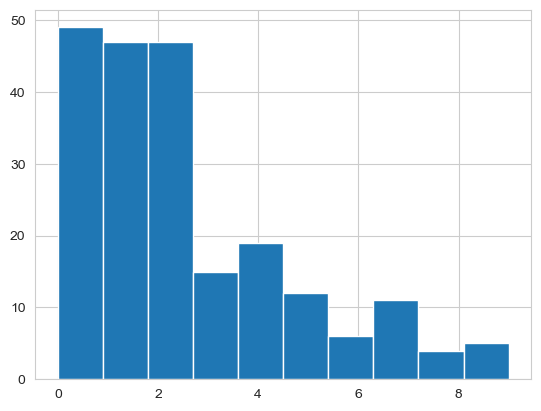

In [39]:
gt_dis = plt.hist(gt_esg)[0]

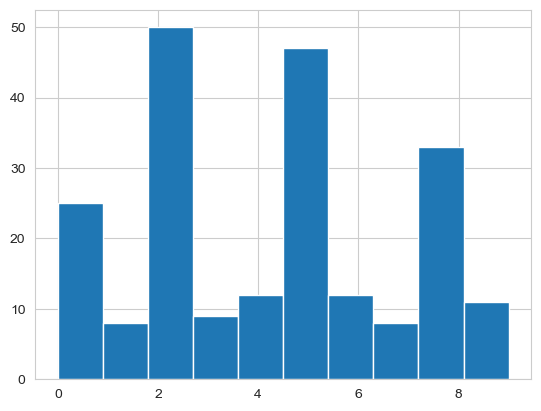

In [41]:
pr_dis =plt.hist(pr_esg)[0]

In [29]:
len(np.where(gt_esg == pr_esg)[0])

45

In [30]:
45/len(gt_esg)

0.20930232558139536

In [31]:
def cross_entropy(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [43]:
cross_entropy(pr_dis, gt_dis)

-629.4559202993247

In [49]:
len(np.where(gt_esg == pr_esg+1)[0])

16

In [50]:
len(np.where(gt_esg == pr_esg-1)[0])

24

In [51]:
(45+16+24)/len(gt_esg)

0.3953488372093023

In [52]:
pr_score = {"N/":0,"E":0,"D-":0,"D":0, "C-":0, "C":0, "C+":0,"B-":1,"B":1,"B+":1,"A-":2,"A":2,"A+":2}
gt_score = {"C":0, "B":0,"BB":0,"BBB⁻":1,"BBB":1,"BBB⁺":1,"A⁻":2,"A":2,"AA⁻":2,"A⁺":2}

In [53]:
gt_esg = [gt_score[i] for i in gt_environment]
pr_esg = [pr_score[i] for i in pr_environment]

In [54]:
gt_esg = np.array(gt_esg)
pr_esg = np.array(pr_esg)

In [58]:
len(np.where(gt_esg == pr_esg)[0])/len(gt_esg)+len(np.where(gt_esg == pr_esg+1)[0])/len(gt_esg)+len(np.where(gt_esg == pr_esg-1)[0])/len(gt_esg)

0.8883720930232558

In [56]:
len(np.where(gt_esg == pr_esg+1)[0])/len(gt_esg)

0.12093023255813953

In [57]:
len(np.where(gt_esg == pr_esg-1)[0])/len(gt_esg)

0.2930232558139535